In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("../week4/gold2.csv")

In [6]:
import random
data = data.rename({'Unnamed: 0':'years', '0':'gold'}, axis =1)
# data['new'] = np.random.randint(2, size=58)
data['new'] = data['years']%2==0


In [8]:
years = data['years']
gold = data['new']


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

In [10]:
xtrain, xtest,ytrain, ytest = tts(years, gold, random_state=42)
model = LogisticRegression()
model.fit(np.array(xtrain).reshape(-1,1), ytrain)
prediction = model.predict(np.array(xtest).reshape(-1,1))

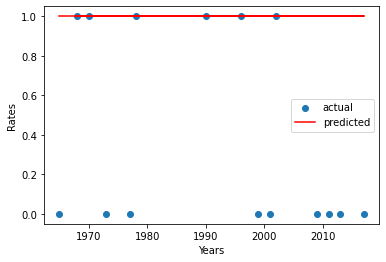

In [11]:
plt.scatter(xtest, ytest, label = 'actual')
plt.plot(xtest, prediction, color = 'red', label = 'predicted')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Rates")
plt.show()

## Underfitting

In [17]:
from sklearn import metrics

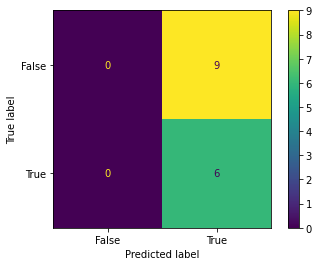

In [18]:
cm = confusion_matrix(ytest, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [20]:
Accuracy = metrics.accuracy_score(ytest, prediction)
Precision = metrics.precision_score(ytest, prediction) 
Sensitivity_recall = metrics.recall_score(ytest, prediction)
Specificity = metrics.recall_score(ytest, prediction, pos_label=0)
F1_score = metrics.f1_score(ytest, prediction)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}) 

{'Accuracy': 0.4, 'Precision': 0.4, 'Sensitivity_recall': 1.0, 'Specificity': 0.0, 'F1_score': 0.5714285714285715}
